#REPORT
Please read first commented line of every code block. It will give you summary along with plots.<br>
Also read in between markdown notes

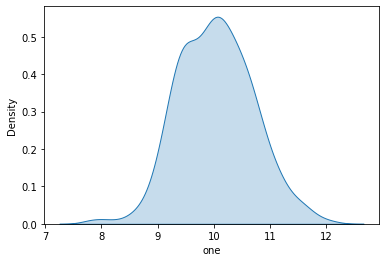

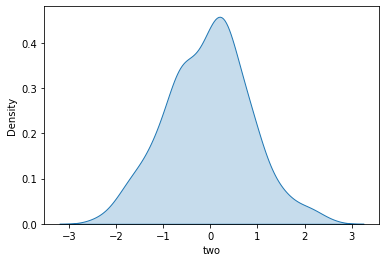

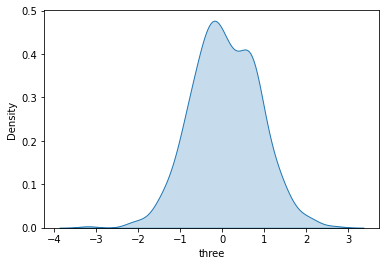

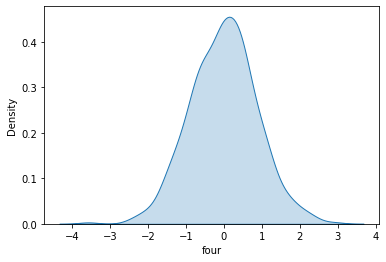

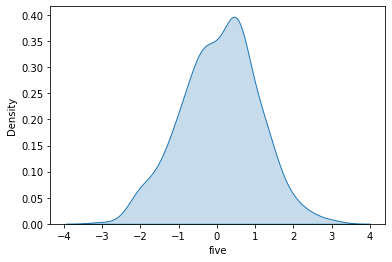

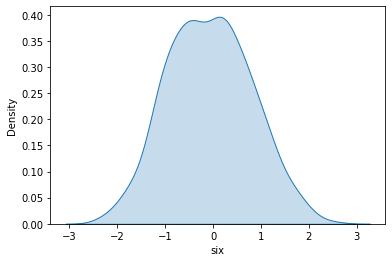

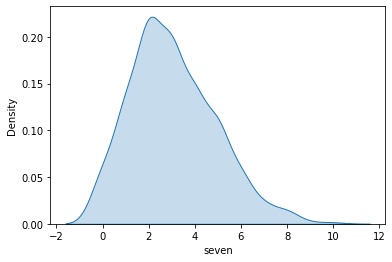

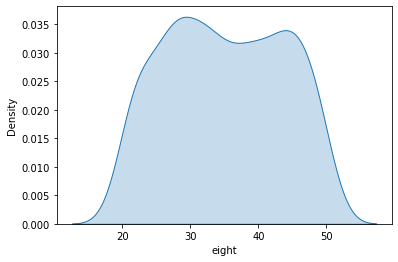

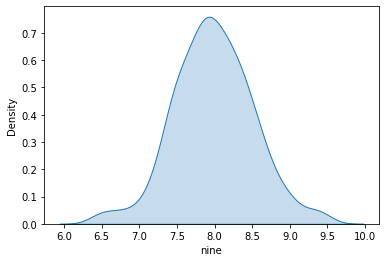

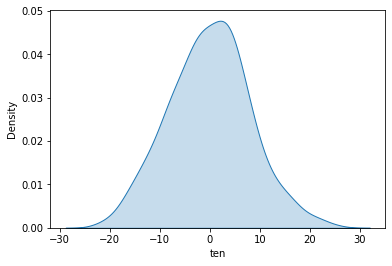

In [ ]:
# Plotting pdf of each RV

import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

data=pd.read_csv('dataset.csv')

column=['zero','one','two','three','four','five','six','seven','eight','nine','ten']

for i in data:
  sb.kdeplot(data[i], shade = True)
  plt.show()

#Summary of Plots/Random Variables<br>
Although the distribution is random,there is some similarity with Gaussian distribution<br>
All distributions are symmetric about its mode value<br>
Random Variable six and eight is bimodal.<br>
Ranodm variable seven is not symmetric about its modal value.It increases from -2 to 2 like a Gaussian but it seems like it is decreasing exponentially after that upto value 10.(I am just relating it. It need not to be exactly exponential or gaussian etc).<br>


In [ ]:
# PLotting the joint distribution and coorelation of RVs taken two at a time

for i in range(1,11):
  for j in range(i+1,11):
    # Extract x and y
    x = data[column[i]]
    y = data[column[j]]
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    print(xmin, xmax, ymin, ymax)
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)


    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    w = ax.plot_wireframe(xx, yy, f)
    ax.set_xlabel(column[i])
    ax.set_ylabel(column[j])
    ax.set_zlabel('PDF')
    ax.set_title('Joint PDF plot');
    plt.show()

    # adds the title
    plt.title('Correlation')
    
    # plot the data
    plt.scatter(x, y)
    
    # fits the best fitting line to the data
    plt.plot(np.unique(x),
    np.poly1d(np.polyfit(x, y, 1))
    (np.unique(x)), color='red')
    
    # Labelling axes
    plt.xlabel(column[i])
    plt.ylabel(column[j])

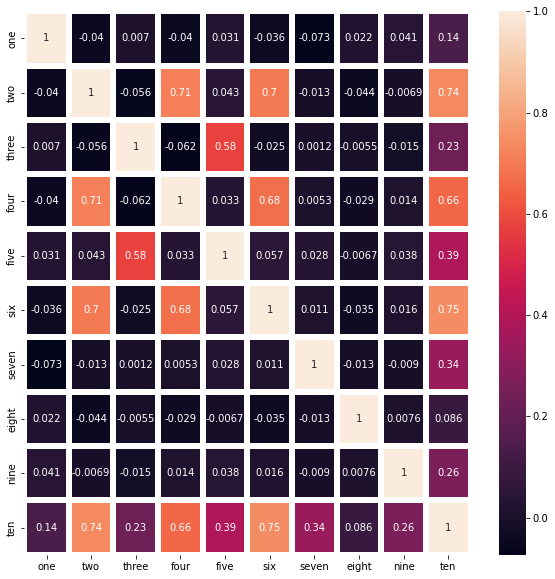

In [ ]:
#plotting the heatmap for correlation
fig, ax = plt.subplots(figsize=(10, 10))
corr = sb.heatmap(data.corr(), annot=True,linewidths=5)

#Summary of Correlation
Here above you can see the correlation matrix, how different RVs are correlated<br>
Below I have printed the correlation in sorted. You can see that pair of RVs which is at bottom is highly positively coorelated.<br>
The values which are at top of sorted order have negative corelation. However they are not so strong as indicated by their values.

In [ ]:
# It gives correlation of different pair of RV in sorted order

from sklearn.preprocessing import LabelEncoder

# Convert categorical values to numeric
label_encoder = LabelEncoder()
data['one'] = label_encoder.fit_transform(data['one'])

# Create correlation matrix
corr_mat = data.corr(method='pearson')

# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
	np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()

# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)


seven  one     -0.079314
four   three   -0.062114
three  two     -0.055779
eight  two     -0.044227
two    one     -0.042644
eight  six     -0.034542
four   one     -0.033848
six    one     -0.033339
eight  four    -0.028667
six    three   -0.025003
nine   three   -0.015284
eight  seven   -0.013211
seven  two     -0.013127
nine   seven   -0.009026
       two     -0.006924
eight  five    -0.006730
       three   -0.005500
three  one     -0.003433
seven  three    0.001162
       four     0.005317
nine   eight    0.007570
seven  six      0.011101
nine   four     0.014145
       six      0.015598
eight  one      0.019613
five   one      0.023043
seven  five     0.028261
five   four     0.033346
nine   five     0.037909
       one      0.038712
five   two      0.042671
six    five     0.056754
ten    eight    0.086216
       one      0.129800
       three    0.226583
       nine     0.260700
       seven    0.338649
       five     0.392279
five   three    0.577065
ten    four     0.657615


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


                one       two     three      four      five       six  \
one    20875.000000 -5.479473 -0.394546 -4.302119  3.327113 -4.205758   
two       -5.479473  0.790915 -0.039457  0.557614  0.037923  0.544190   
three     -0.394546 -0.039457  0.632657 -0.043462  0.458691 -0.017365   
four      -4.302119  0.557614 -0.043462  0.773874  0.029315  0.518670   
five       3.327113  0.037923  0.458691  0.029315  0.998673  0.049521   
six       -4.205758  0.544190 -0.017365  0.518670  0.049521  0.762366   
seven    -21.137275 -0.021533  0.001705  0.008628  0.052094  0.017878   
eight     24.421500 -0.338977 -0.037701 -0.217338 -0.057960 -0.259927   
nine       2.968679 -0.003268 -0.006452  0.006605  0.020107  0.007229   
ten      152.531735  5.324937  1.465830  4.705214  3.188448  5.301421   

           seven      eight      nine         ten  
one   -21.137275  24.421500  2.968679  152.531735  
two    -0.021533  -0.338977 -0.003268    5.324937  
three   0.001705  -0.037701 -0.006452   

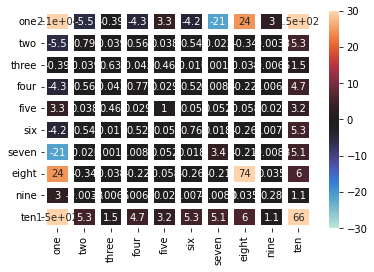

In [ ]:
# Its just covariance matrix.
df = pd.DataFrame(data)
print(df.cov())
sb.heatmap(df.cov(), annot=True,linewidths=5,center=0,vmax=30,vmin=-30)

#Calculating Bounds
Using Chebyshev Inequality to calculate bounds<br>
For all the RVs, finding the standard deviation and mean and then applying Chebyshev's inequality.<br>
If k = 2 then by Chebyshev inequality, the probability that data is further than 0.25*sigma or 1/4 * sigma from mean should be less than 1/4 or 25%)<br>
sigma is standard deviation.

In [ ]:
import statistics as stat
sigma = [-1] 
mean = [-1]
k = 2
for i in range(1,11):
  sigma.append(stat.stdev(data[column[i]]))
  mean.append(stat.mean(data[column[i]]))

print("Probability that data for given random variable is further than" ,k,"*SD from mean is: ")
for i in range(1,11):
  count = 0
  for j in range(len(data[column[i]])):
    x = data[column[i]][j]
    if ((x - mean[i]) >= k*sigma[i]) or ((mean[i]-x) >= k*sigma[i]):
      count = count + 1
  print(column[i],"-",count/len(data[column[i]]))

Probability that data for given random variable is further than 2 *SD from mean is: 
one - 0.0
two - 0.052
three - 0.038
four - 0.046
five - 0.048
six - 0.038
seven - 0.042
eight - 0.0
nine - 0.056
ten - 0.046


#Best Guess of X given Y
By the concept of MMSE as discussed by sir in lecture, expected error between X and any function of Y is minimized when the function is E(X|Y).<br> So E(X|Y=y) is the best guess of X if you know Y.<br> <br>

If we explain in terms of visualization of plot , when we fix value of Random Variable Y in the plot of joint probability of XY , then we will get a 2D sliced density plot (a curve) from the 3D plot of joint probability. Then we calculate the expectation of this distribution and that will be ours best guess of X given Y.<br>
Below is the program for same

Enter value of random variable y to get expectation for X: 2
Plot of P(2|seven=2)


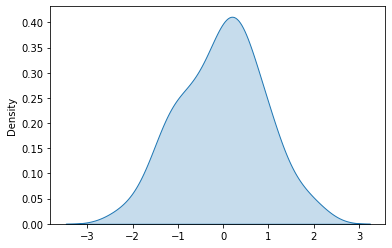

The expected value of RV 2 for given value of RV seven(2) is: -0.03574647252136754


In [ ]:
XgivenY = []
X = 2 #Enter the random variable to get expectation for
y=7
Y = int(input("Enter value of random variable y to get expectation for X: ")) #Enter value of random variable y to get expectation for X

for i in range(len(data[column[Y]])):
  if data[column[y]][i] == Y:
    XgivenY.append(data[column[X]][i])

print("Plot of P({0}|seven={1})".format(X,Y))
sb.kdeplot(XgivenY,fill=True)
plt.show()

#calculating expectation
prob = 1/len(XgivenY)
expectation = 0
for i in range(len(XgivenY)):
  expectation = expectation + XgivenY[i]*prob

print("The expected value of RV {0} for given value of RV seven({1}) is: {2}".format(X,Y,expectation))